In [20]:
%matplotlib inline

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [22]:
X = np.load("X.npy")
y = np.load("y.npy")

In [46]:
X.shape

(4177, 10)

## Here we split the data and apply the K-NN classifier

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [117]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [118]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [13  8  9 ..., 12  9 11]


In [119]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.20


### Here we plot the Accuracy for different values of K

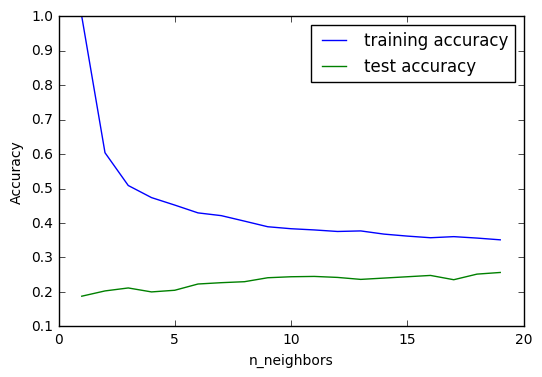

In [121]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### The results with the K-NN algorithm is not the best method because the accuracy is very low.
### We try now the K-NN regressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [73]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.48


### The accuracy is improved with this method. More than 50 percent of accuracy.

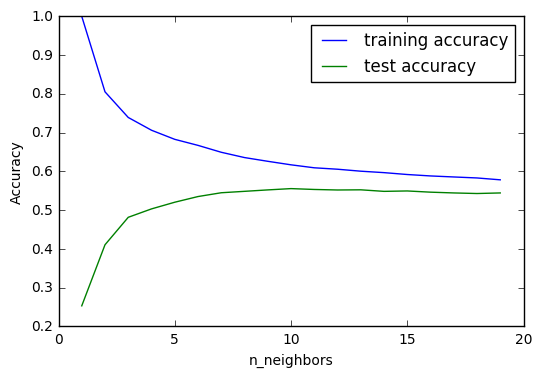

In [97]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Here we did a simple linear regression, the accuracy is better than K-NN and is in the same order of  the  K-NN regressor (0.54).

In [78]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [79]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [  0.07687017  11.00177838   7.65339606   9.21327236 -20.30920844
 -10.64005679   8.9611355    0.27378623  -0.59490891   0.32112267]
lr.intercept_: 3.7618691468837175


In [80]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.54
Test set score: 0.54


### Here we use the Ridge algorithm which gives the best results for alpha values lower than 1, the accuracy is still in the same order of the previous methods.

In [87]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.48
Test set score: 0.50


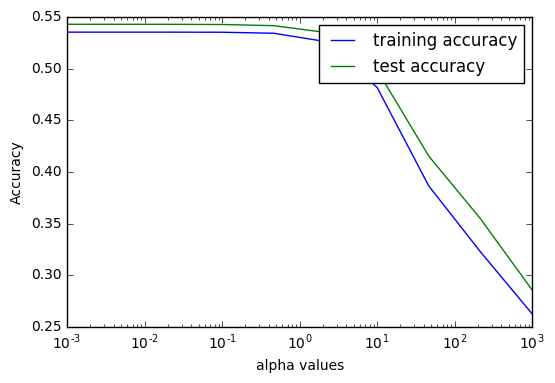

In [113]:
training_accuracy = []
test_accuracy = []

N=10
alpha_settings=np.logspace(-3, 3, N, endpoint=True)

for alpha in alpha_settings:
    # build the model
    #clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf=Ridge(alpha=alpha).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha values")
plt.xscale("log")
plt.legend()